## Alireza Farajtabrizi (97102185) Lab 6


### Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import random as rnd
from skimage import io
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import cv2

### Load Images

In [2]:
images = []
path = 'data/'

for filename in os.listdir(path):
    img = cv2.imread(path+'/'+ filename)
    images.append(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Dog

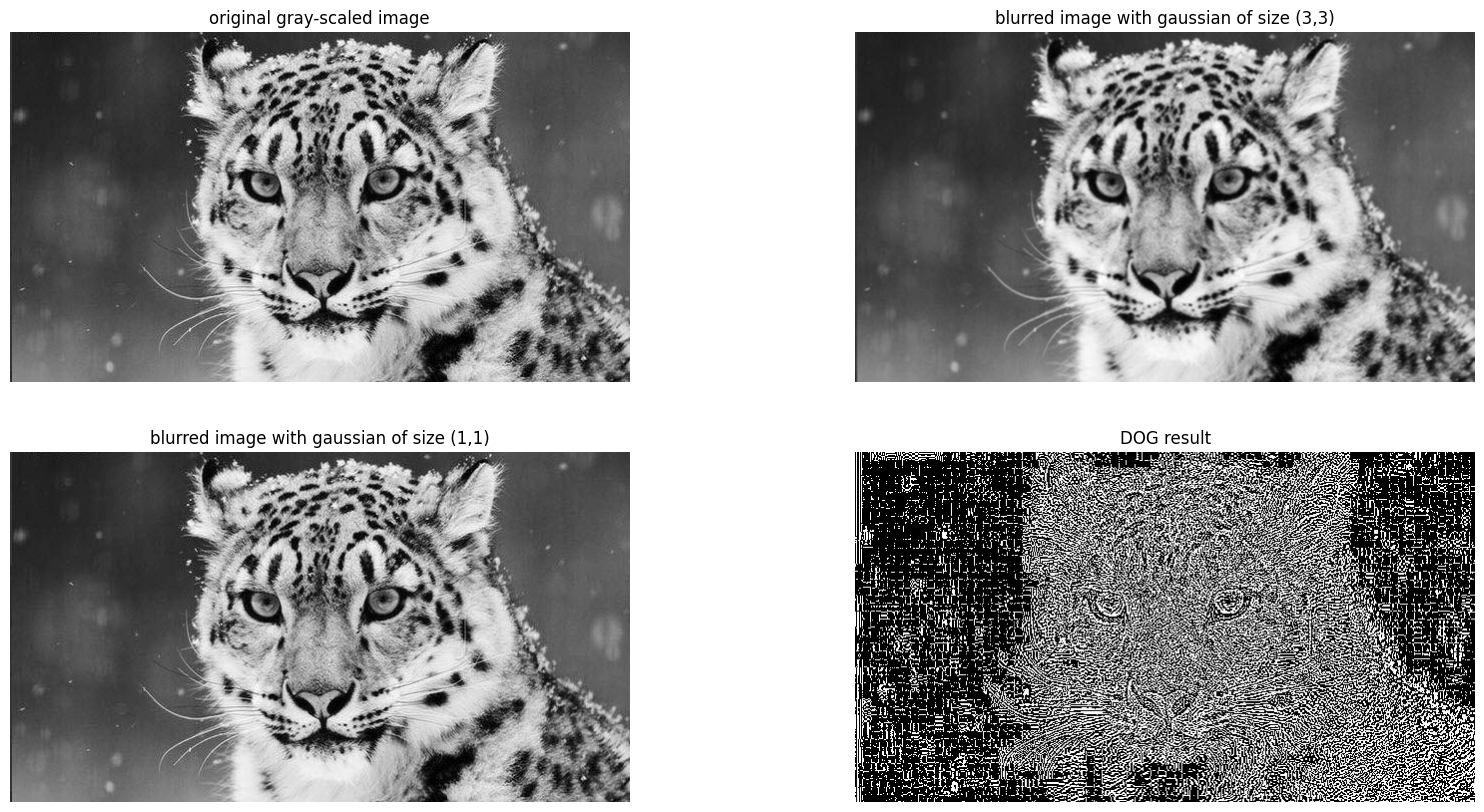

In [3]:
img = images[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur1 = cv2.GaussianBlur(img, (3,3), 0)
img_blur2 = cv2.GaussianBlur(img, (1,1), 0)
img_dog = img_blur1 - img_blur2

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('original gray-scaled image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_blur1, cmap='gray')
plt.title('blurred image with gaussian of size (3,3)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_blur2, cmap='gray')
plt.title('blurred image with gaussian of size (1,1)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_dog, cmap='gray')
plt.axis('off')
plt.title('DOG result')
plt.show()

## SIFT

### Feature Plotting

Number of Features : 1613 and 899


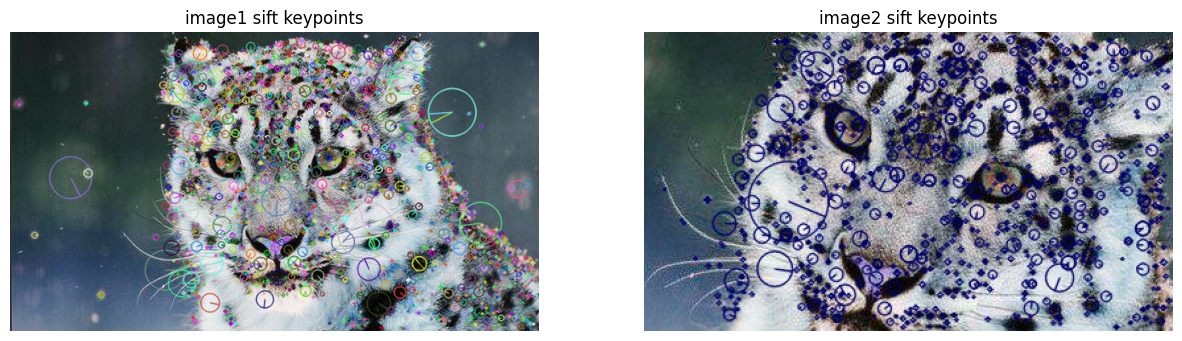

In [4]:
siftobject = cv2.SIFT_create()

#drawing the keypoints and orientation of the keypoints in the image and then displaying the image as the output on the screen
kp1 , des1 = siftobject.detectAndCompute(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), None)
kp_img1 = cv2.drawKeypoints(images[0], kp1, None, flags=4)

kp2 , des2 = siftobject.detectAndCompute(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY), None)
kp_img2 = cv2.drawKeypoints(images[1], kp2, None, color =(0,0,100), flags=4)

print('Number of Features :', len(kp1), 'and', len(kp2) )

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(kp_img1)
plt.title('image1 sift keypoints')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(kp_img2)
plt.title('image2 sift keypoints')
plt.axis('off')
plt.show()


توضیح توابع: تابع دیتکت اند کامپیوت دو خروجی دارد که اولی یک ابجکت مخصوص است و دومی یک ارایه کا ان در 128 است که ان تعداد ویژگی هاست. خروجی اول یک لیست ابجکت هاست که هر ابجکت ویژگی هایی مانند مکان ویژگی، زاویه ویژگی، اکتاو ویژگی و ... را به عنوان اتربیوت می تواند به ما بدهد. تابع دوم یا همان تابع درا کی پوینتس دو پارمتر مهم دارد یکی فلگ که بسته به مقدارش نحوه نمایش بصری ویژگی ها تغییر می کند و دومین پارامتر هم تعیین رنگ این نمایش است.

### Feature Matching

575 good matches


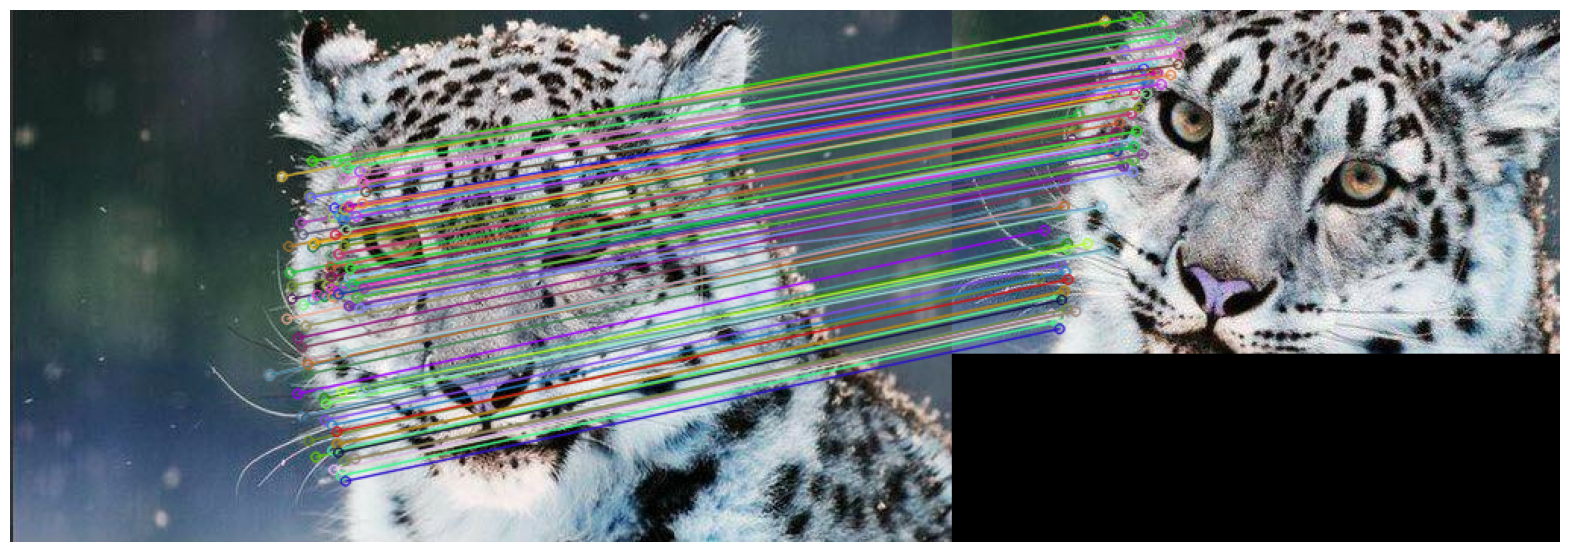

In [5]:
# create BFMatcher object
bf = cv2.BFMatcher()

#only the first best matches for each keypoint is returned
matches = bf.knnMatch(des1, des2, k=2) 

# Sort them in the order of their distance.
good_matches = []

for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])
print('%d good matches' % len(good_matches))

# Draw first 100 matches.
img3 = cv2.drawMatchesKnn(images[0],kp1,images[1],kp2,good_matches[:100],images[1],flags=2)

plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.axis('off')
plt.show()

من فقط 100 تا از کل مچ های موجود رو رسم کردم و خب همونطور که قابل مشاهد است سمت راست صورت پلنگ رو در دو تصویر به هم متصل کرده است. این علی رغم برش و چرخش تصویر است که نشان دهنده قدرت این روش است.

## K-means

### Appending Point Arrays

In [16]:
kp1, des1 = siftobject.detectAndCompute(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), None)
kp2, des2 = siftobject.detectAndCompute(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY), None)
kp3, des3 = siftobject.detectAndCompute(cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY), None)

m12 = int(0.8*min(des1.shape[0],des2.shape[0]))
m13 = int(0.8*min(des1.shape[0],des3.shape[0]))

print(m12,m13)

points_12 = np.append(des1[:m12], des2[:m12], axis=0)
points_13 = np.append(des1[:m13], des3[:m13], axis=0)


719 978


### Clustering and Plotting

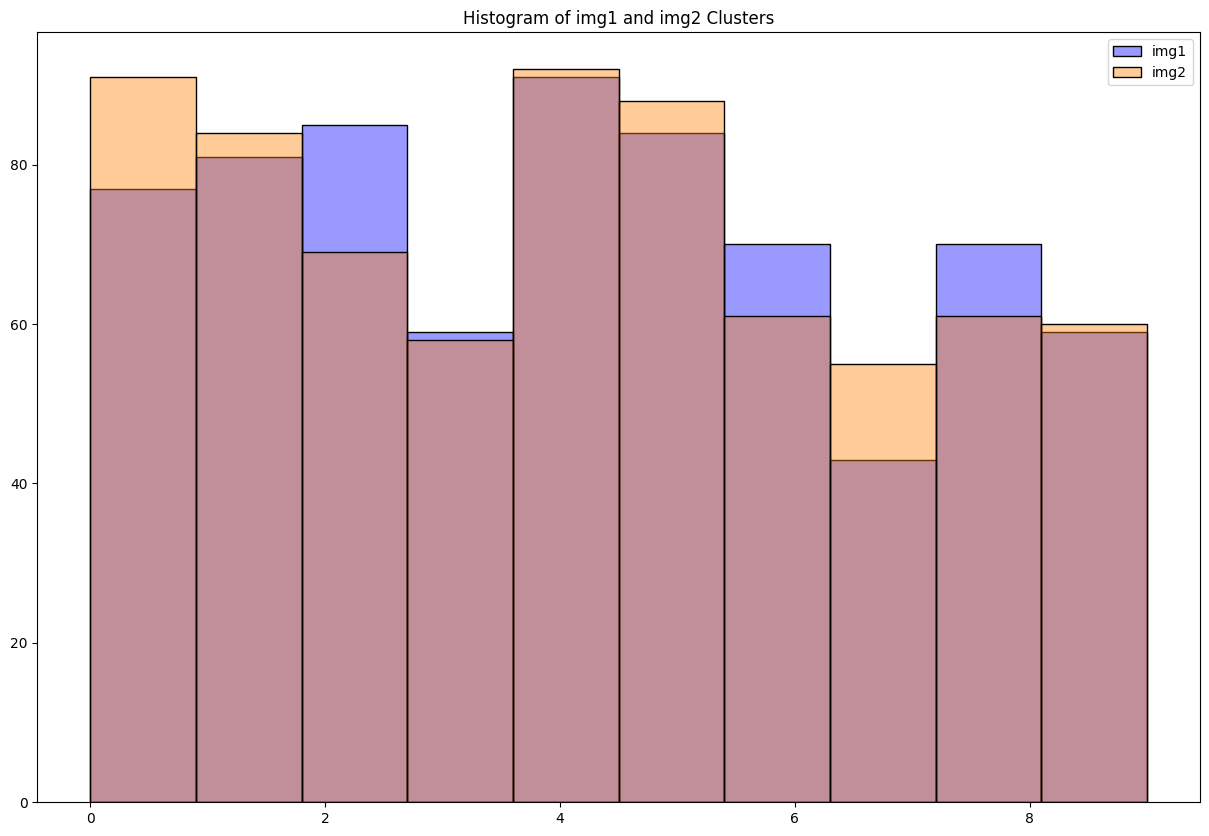

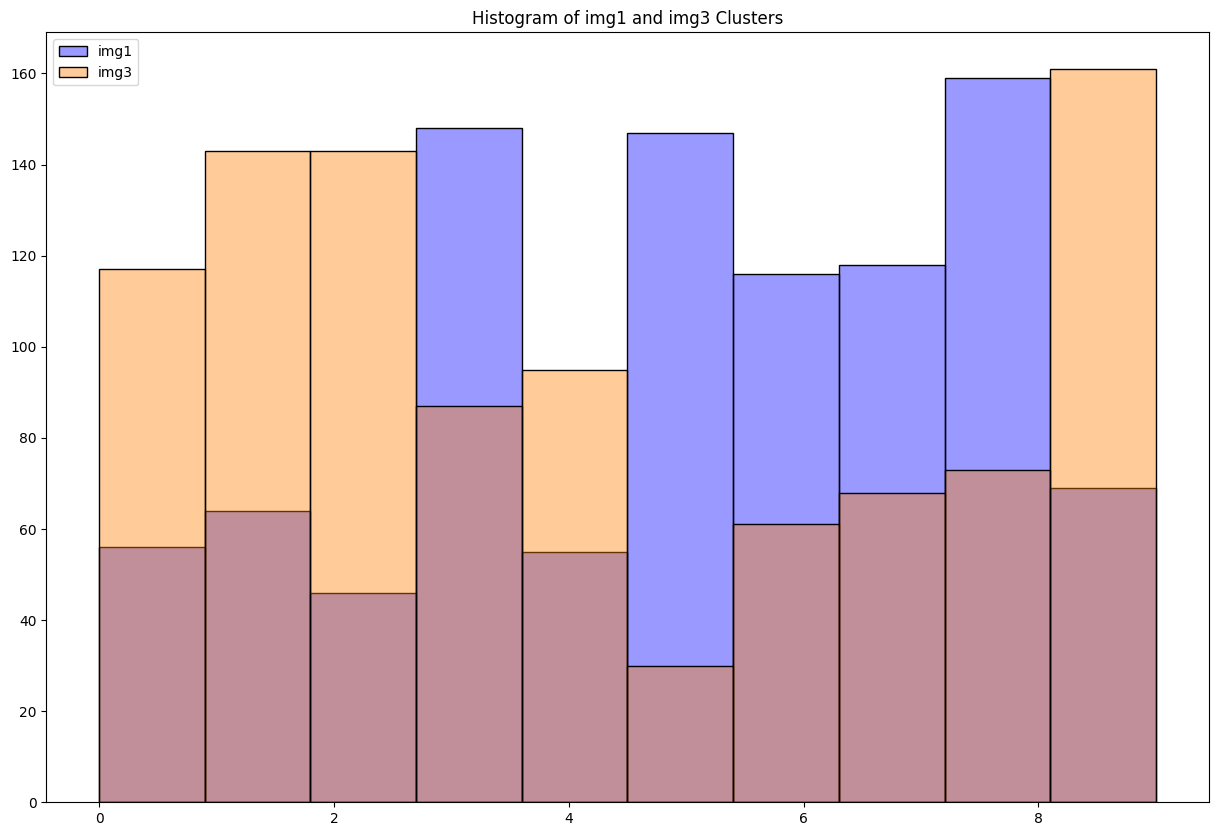

In [17]:
from sklearn.cluster import KMeans

kmeans_12 = KMeans(init='random', n_clusters=10, n_init=10, max_iter=500, random_state=42)
kmeans_12.fit(points_12)

img1_labels = kmeans_12.labels_[:m12]
img2_labels = kmeans_12.labels_[m12:]

plt.figure(figsize=(15,10))
plt.hist(img1_labels, bins = 10, fc=(0, 0, 1, 0.4), edgecolor='black')
plt.hist(img2_labels, bins = 10, fc=(1, 0.5, 0, 0.4), edgecolor='black')
plt.legend(['img1', 'img2'])
plt.title('Histogram of img1 and img2 Clusters')
plt.show()

kmeans_13 = KMeans(init='random', n_clusters=10, n_init=10, max_iter=500, random_state=42)
kmeans_13.fit(points_13)

img1_labels = kmeans_13.labels_[:m13]
img3_labels = kmeans_13.labels_[m13:]

plt.figure(figsize=(15,10))
plt.hist(img1_labels, bins = 10, fc=(0, 0, 1, 0.4), edgecolor='black')
plt.hist(img3_labels, bins = 10, fc=(1, 0.5, 0, 0.4), edgecolor='black')
plt.legend(['img1', 'img3'])
plt.title('Histogram of img1 and img3 Clusters')
plt.show()

از تفاوت دو نمودار کاملا واضح است که اگر تصاویر مشابه باشند تعداد اعضای هر کلاستر تفاوت زیادی ندارند و اون معدود اختلاف هم متعلق به قسمت بریده تصویر 1 در تصویر 2 است. اما این تفاوت بین تصویر 2 و 3 خیلی زیاد است و یعنی دو تصویر به هم بی ربط اند.
لذا الگوریتم می تواند به این صورت باشد: ابتدا برای هر دو تصویر ویژگی ها را استخراج می کنیم و به اندازه 0.8 ضرب در مینیمم تعداد ویژگی دو تصویر، از هردو تصویر بر می داریم و بهم میچسبانیم. سپس نقاط را به یک کلاستر کننده می دهیم و مثلا نقاط را به 10 کلاستر تقسیم می کنیم. اگر نسبت اعضا در این دسته ها به طور متوسط بیشتر از 0.8 بود یعنی عکس ها یکسان اند در غیر این صورت متفاوت اند.